### QED-C Application-Oriented Benchmarks - Qiskit Version - Max-Cut
The notebook contains Max-Cut application-oriented benchmark for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one variation on the benchmark.

In [1]:
min_qubits=4
max_qubits=16
max_circuits=1
num_shots=2048   # for num_shots=1000, getting error for 16th qubit in cell[8] [ERROR: polarization_fidelity(), expected distribution is invalid, all counts equal to 0]

backend_id="fake_guadalupe"    # a 16 qubit fake backend
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples create a provider instance and get a backend from it

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

import sys
sys.path.insert(1, "../../")

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### Maxcut - Method 1

This method creates an ansatz circuit for the MaxCut problem at each width, executes it, and then compares its performance against a classically computed expectation for that size problem. Note that the computation of the expectation can be very slow for qubit widths larger than 16. The do_fidelites argument can be set to False to disable the computation, but this will result in all fidelities = 1.

MaxCut (1) Benchmark Program - Qiskit
... execution starting at Jun 28, 2024 08:34:27 UTC
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Executing [1] circuits for num_qubits = 8
************
Executing [1] circuits for num_qubits = 10
************
Executing [1] circuits for num_qubits = 12
************
Executing [1] circuits for num_qubits = 14
************
Executing [1] circuits for num_qubits = 16
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 21, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 22, 0.4, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.256, 4.365, 0.112 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.909, 0.909

************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 18, 0.4

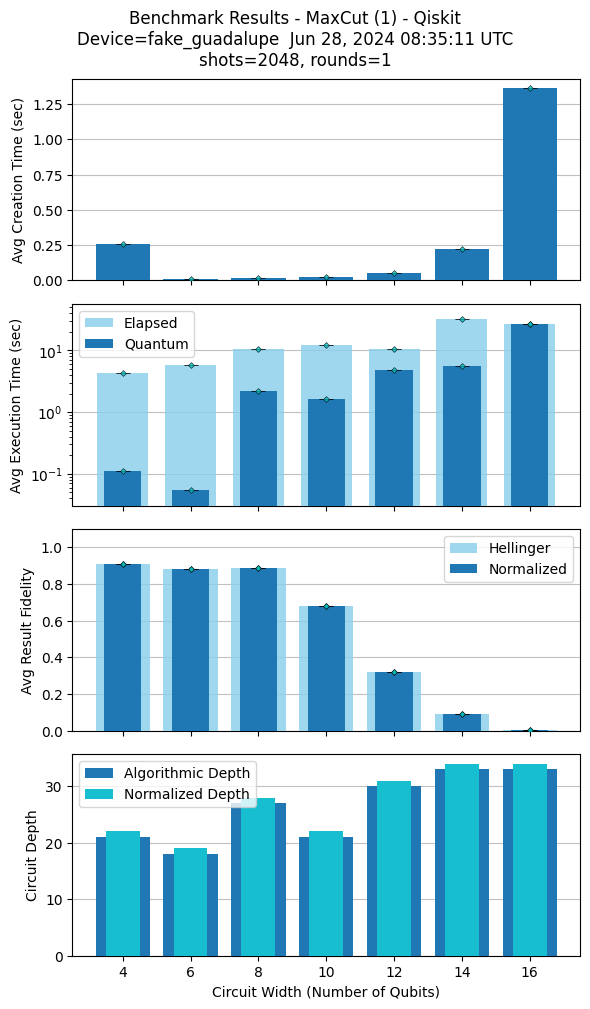

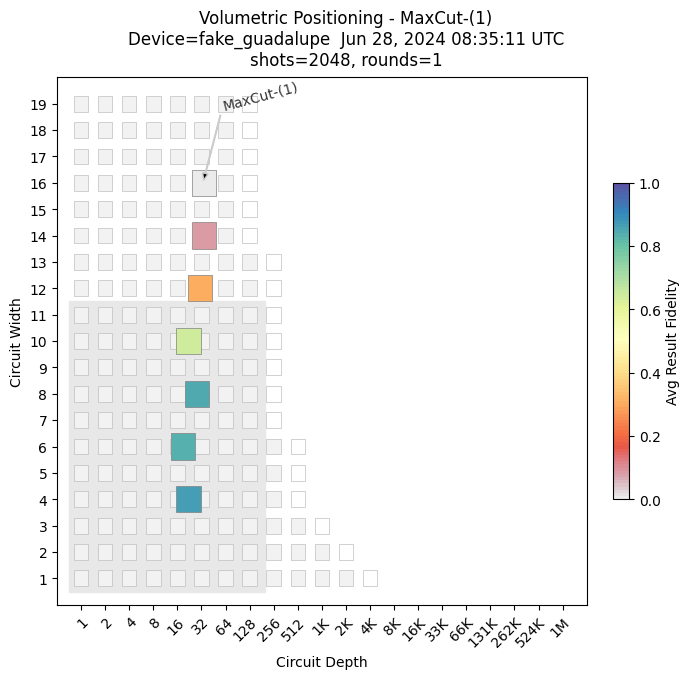

In [3]:
import sys
sys.path.insert(1, "maxcut/fake_backend")
import maxcut_benchmark

# set noise to None for testing
# import execute
# execute.set_noise_model(None)

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, rounds=1, do_fidelities=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Approximation Ratio as Objective Function

The method (2) cells execute the full QAOA algorithm, attempting to converge on best parameters to solve the problem.

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jun 28, 2024 08:35:12 UTC
************
Executing [1] restarts for num_qubits = 4

..............................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.067, 0.054 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6

..............................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.087, 0.069 secs
Average Transpiling, Validating, Ru

IOStream.flush timed out


.............................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 14 qubit group = 64, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 14 qubit group = 65, 0.462, 84.0
Average Creation, Elapsed, Execution Time for the 14 qubit group = 0.001, 10.489, 10.461 secs
Average Transpiling, Validating, Running Times for group 14 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 14 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 16

........

IOStream.flush timed out


......................
************
Average Circuit Algorithmic Depth, ξ (xi) for the 16 qubit group = 64, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 16 qubit group = 65, 0.462, 96.0
Average Creation, Elapsed, Execution Time for the 16 qubit group = 0.001, 33.973, 33.946 secs
Average Transpiling, Validating, Running Times for group 16 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 16 qubit group = 1.0, 1.0

... execution complete at Jun 28, 2024 09:00:15 UTC in 1502.742 secs

Sample Circuit:
        ┌───┐                                                            »
   q_0: ┤ H ├─■──────────────■─────────────────────────────■─────────────»
        ├───┤ │ZZ(-0.91695)  │                             │             »
   q_1: ┤ H ├─■──────────────┼──────────────■──────────────┼─────────────»
        ├───┤                │              │ZZ(-0.91695)  │             »
   q_2: ┤ H ├────────────────┼──────────────■──────────────┼─────────────»
   

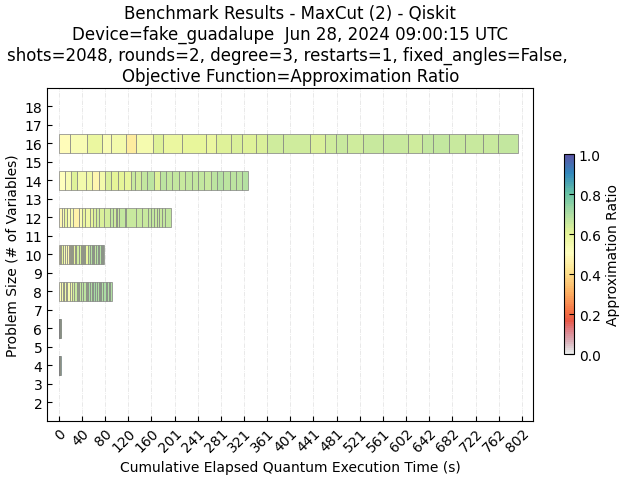

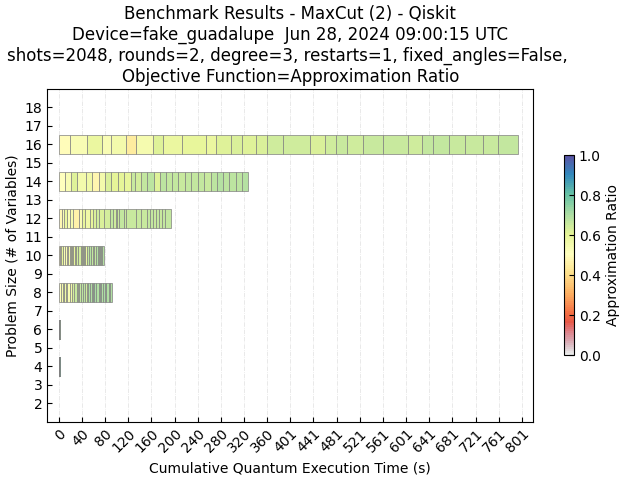

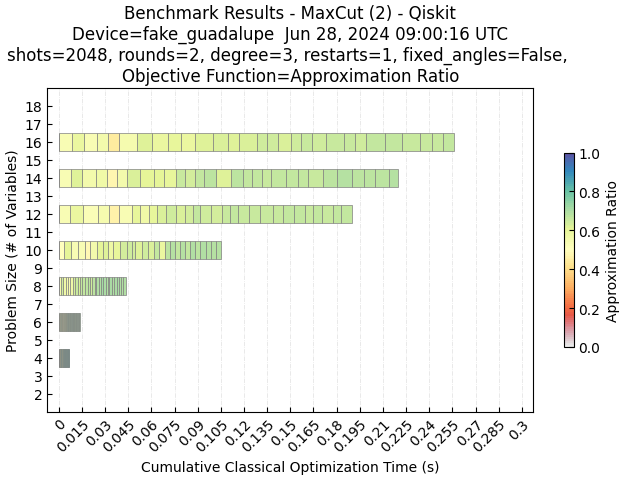

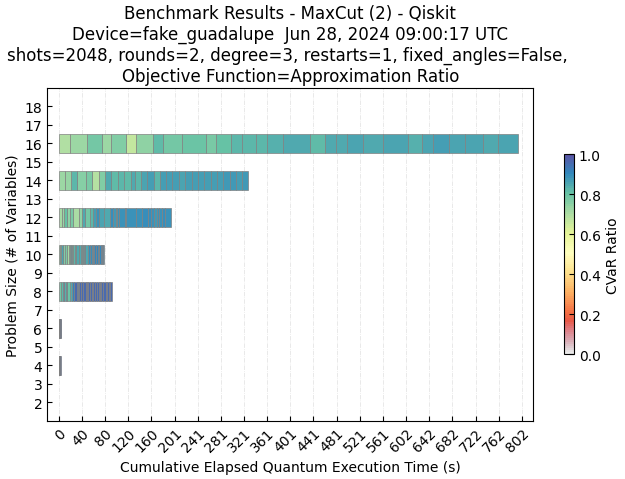

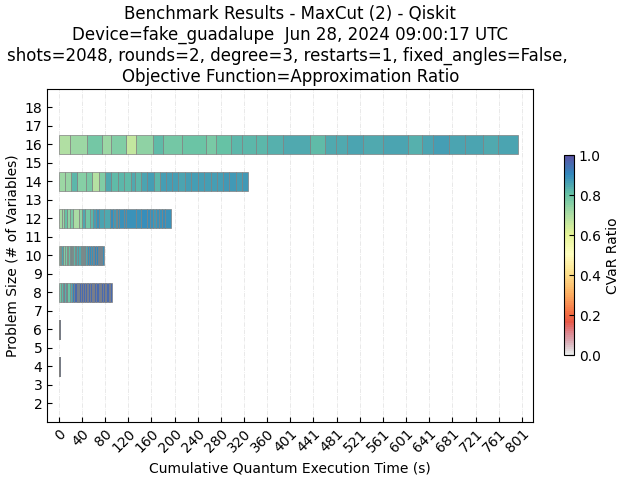

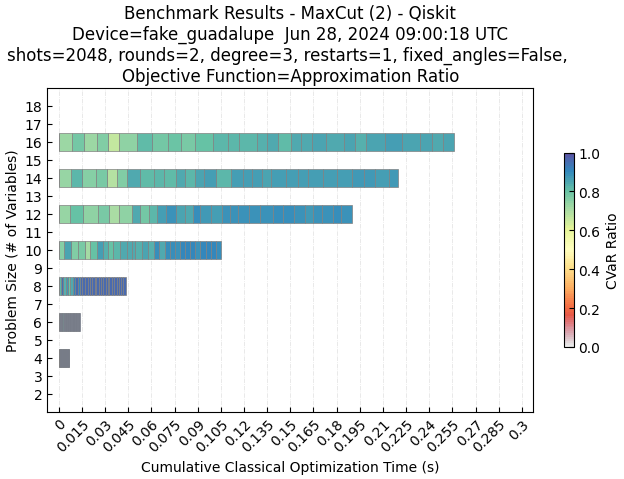

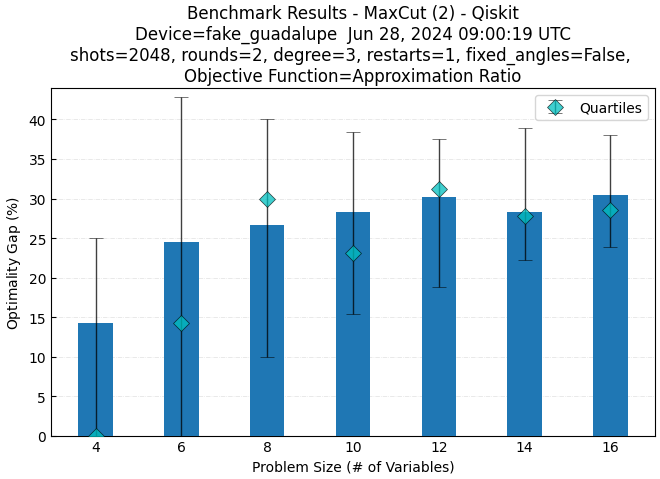

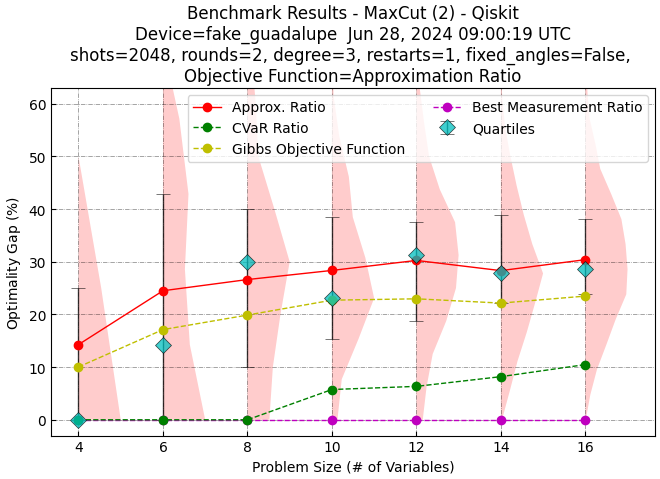

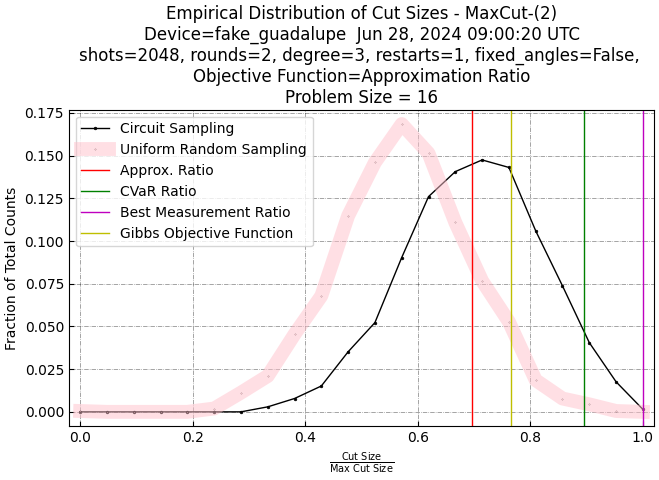

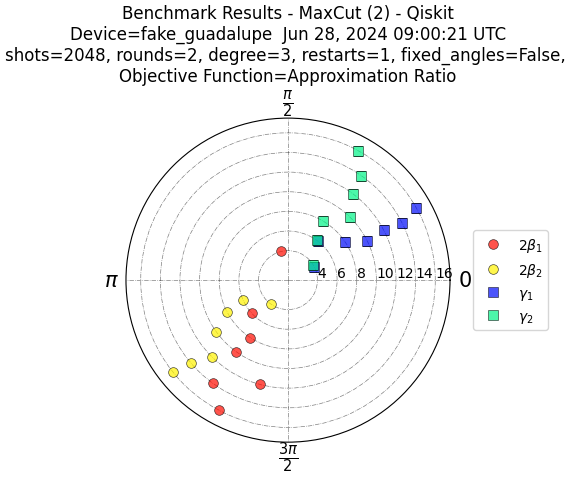

In [4]:
import sys
sys.path.insert(1, "maxcut/fake_backend")
import maxcut_benchmark

# # set noise to None for testing
# import execute
# execute.set_noise_model(None)

# execute and display options
objective_func_type = 'approx_ratio'
score_metric=['approx_ratio', 'cvar_ratio']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, do_fidelities=False, parameterized=False, use_fixed_angles=False,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True, comfort=True,
    objective_func_type = objective_func_type,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... execution starting at Jun 28, 2024 09:00:21 UTC
Loading from width_4_restartInd_1.json, corresponding to 4 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.0, 0.067, 0.054 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

Loading from width_6_restartInd_1.json, corresponding to 6 qubits and restart index 1
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.087, 0.069 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 

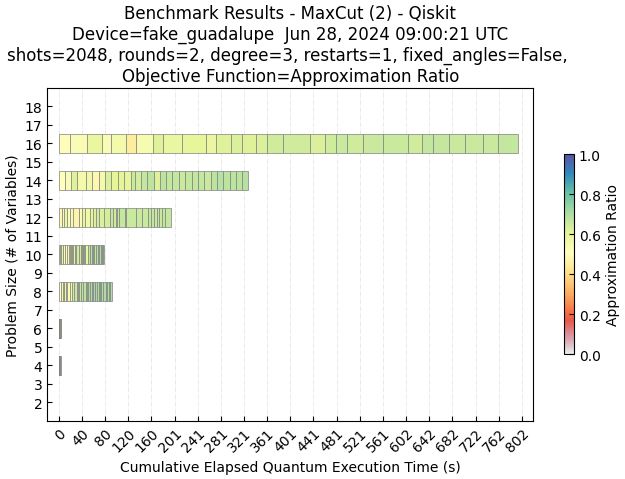

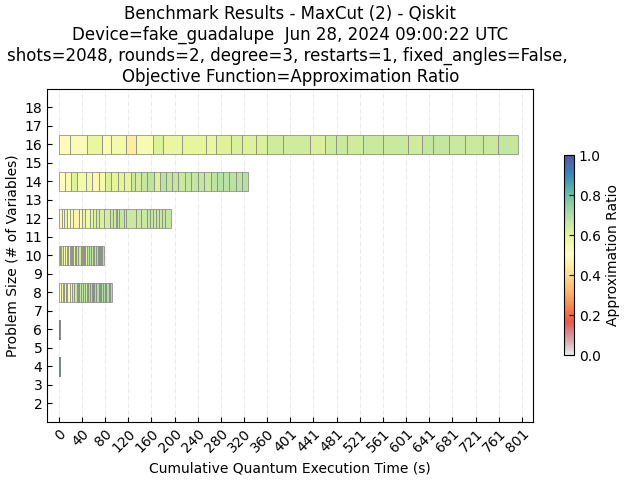

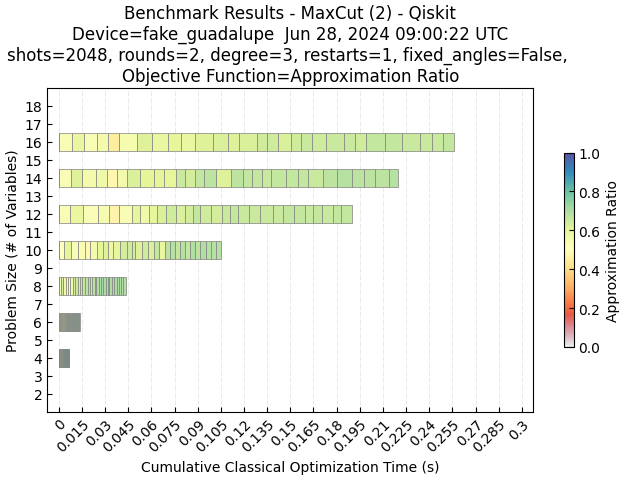

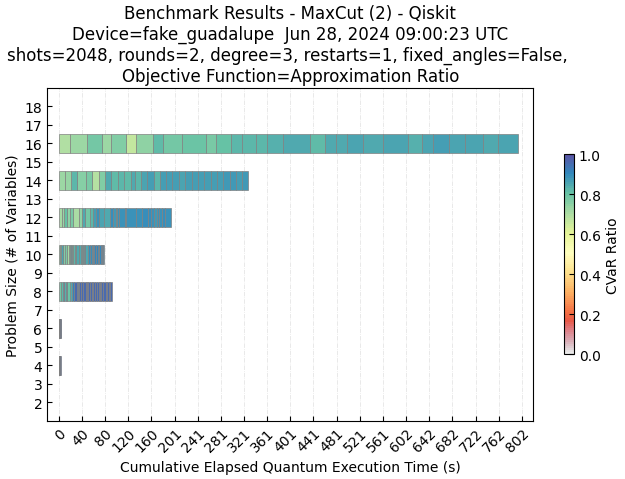

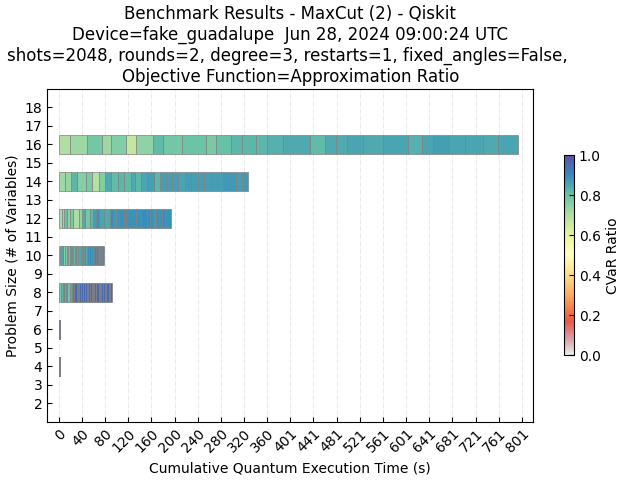

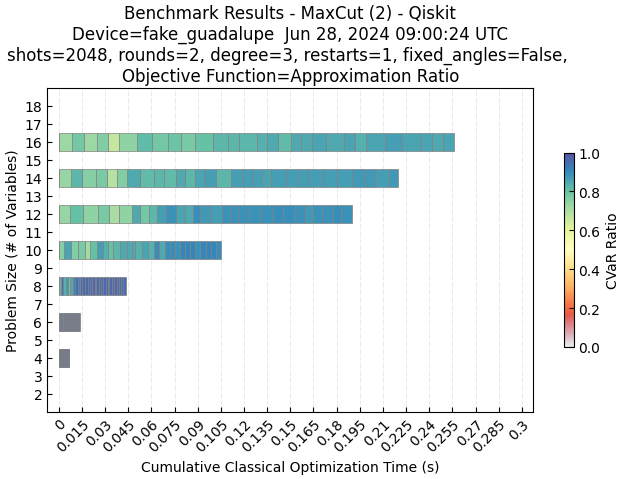

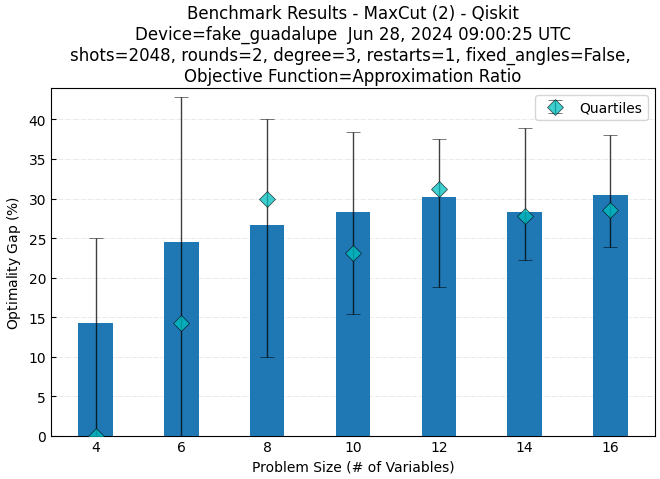

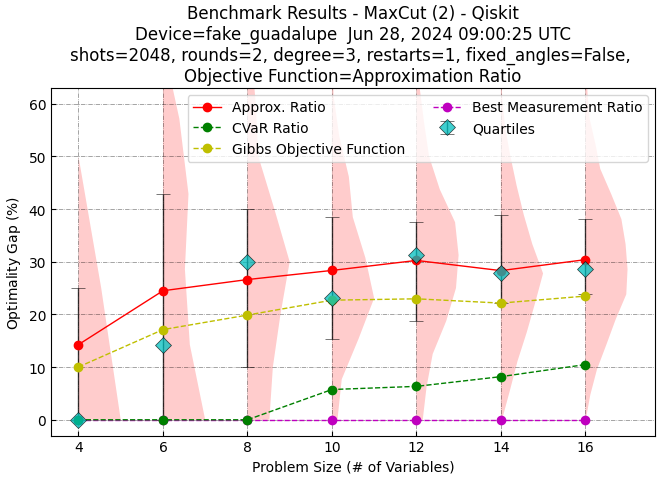

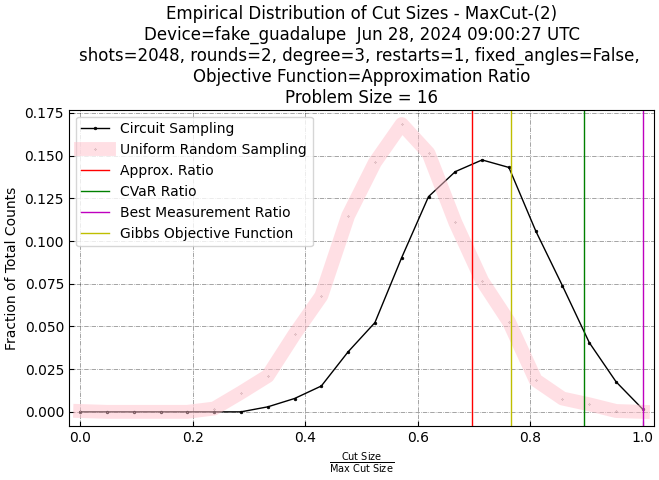

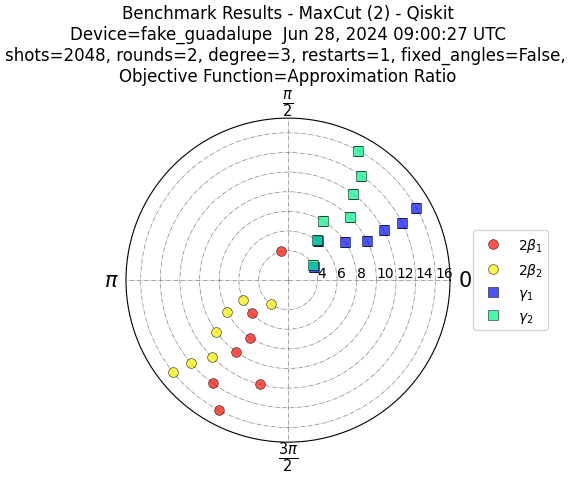

In [5]:
import os, maxcut_benchmark
backend_id = "fake_guadalupe"
maxcut_benchmark.load_data_and_plot(os.path.join('__results', backend_id, 'approx_ratio'),
                score_metric=['approx_ratio', 'cvar_ratio'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time', 'cumulative_opt_exec_time'])

### Maxcut - Method 2 - Degree 3 - CVaR Objective Function

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jun 28, 2024 09:00:28 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.142, 0.123 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.149, 0.132 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average Hel

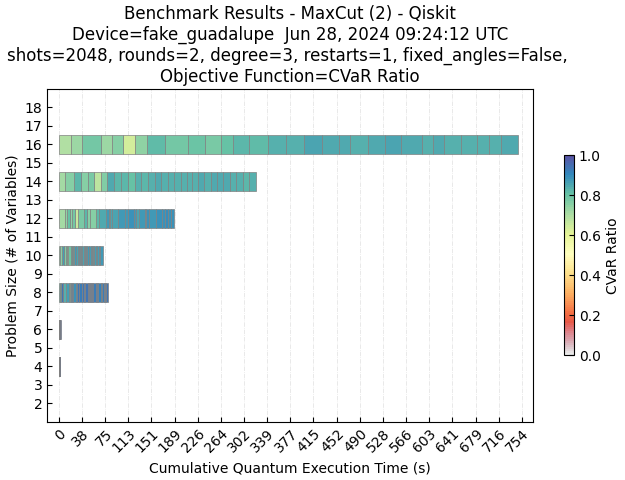

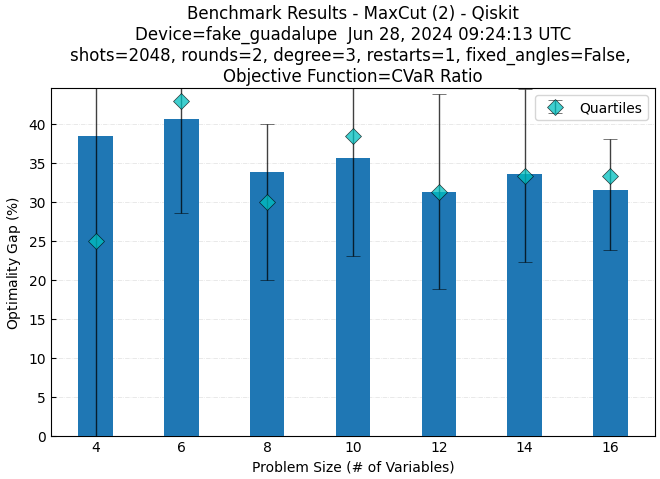

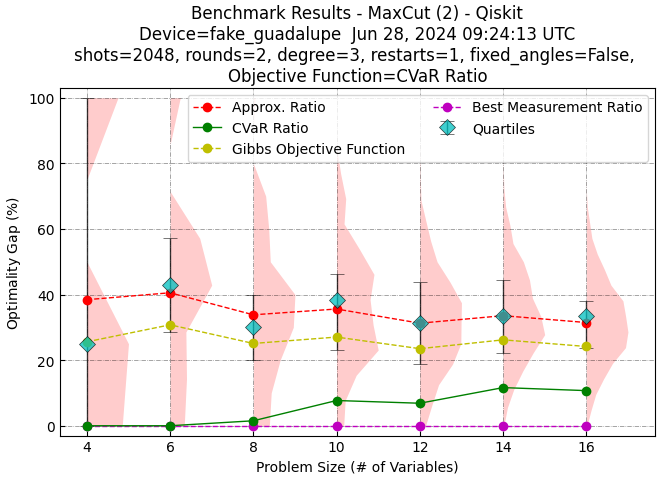

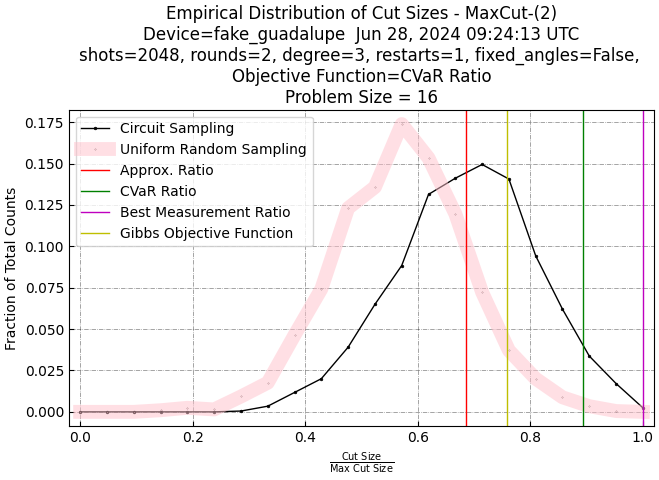

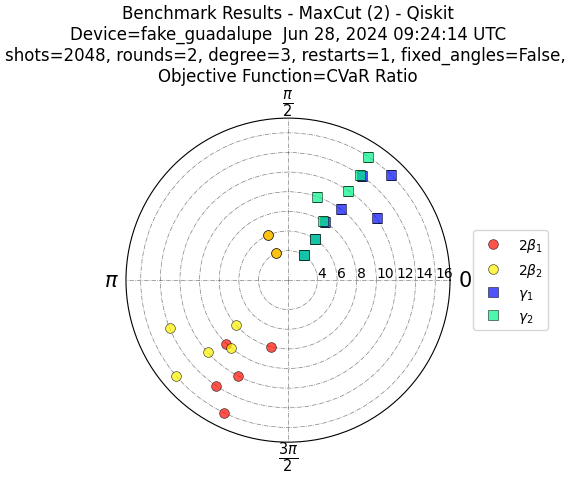

In [6]:
import sys
sys.path.insert(1, "maxcut/fake_backend")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'cvar_ratio'
score_metric=[objective_func_type]
x_metric=['cumulative_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, alpha = 0.1,
    objective_func_type = objective_func_type, do_fidelities = False,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Gibbs Objective function

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jun 28, 2024 09:24:14 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.001, 0.071, 0.054 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.079, 0.063 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average Hel

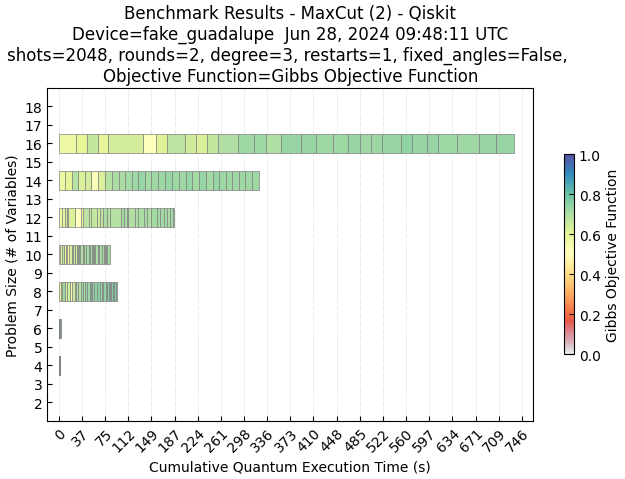

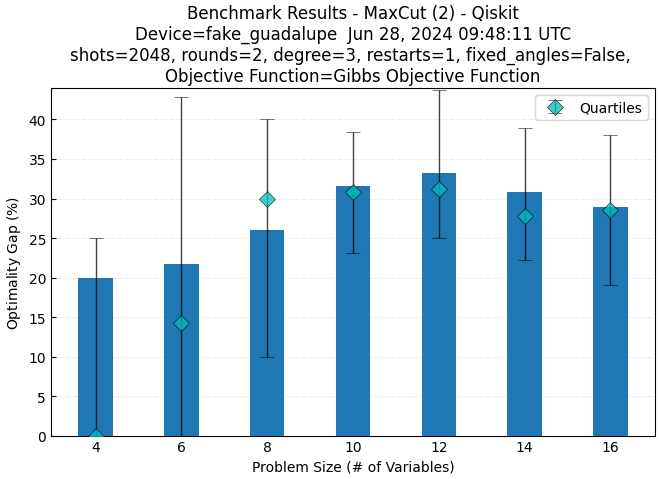

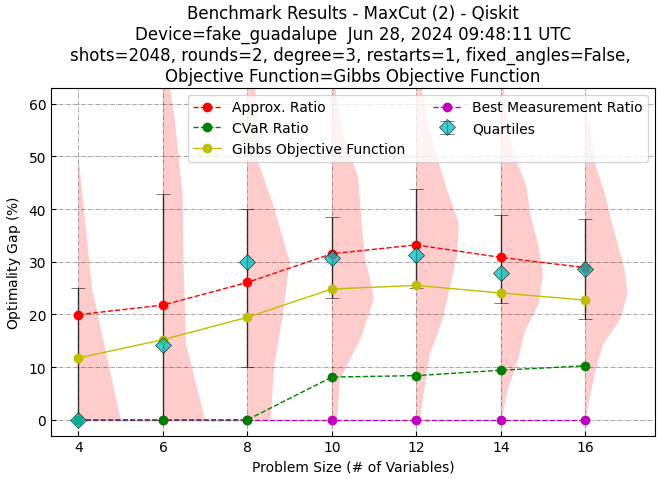

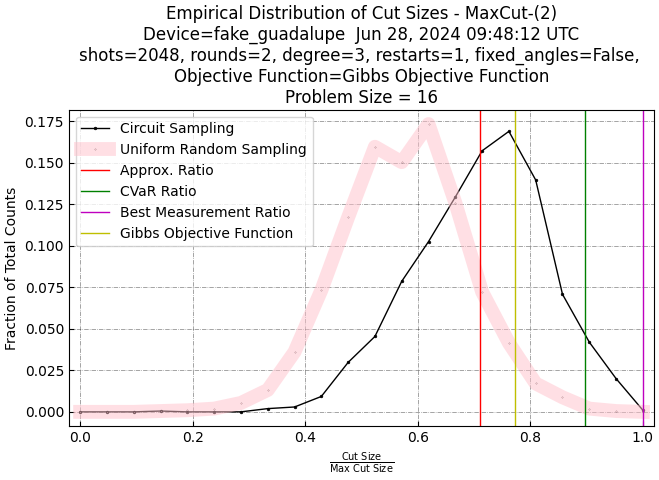

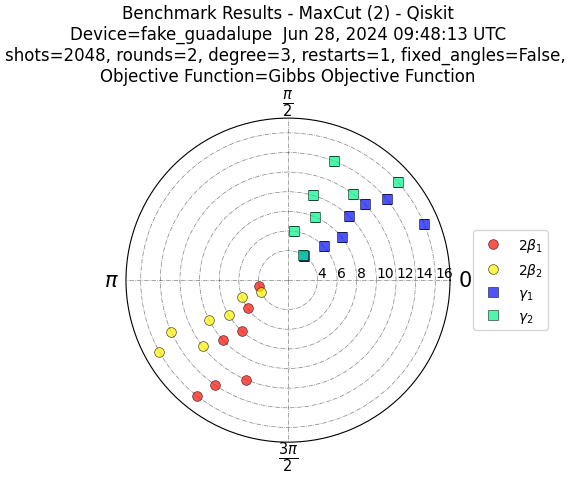

In [7]:
import sys
sys.path.insert(1, "maxcut/fake_backend")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'gibbs_ratio'
score_metric=[objective_func_type] #, 'fidelity'
x_metric=['cumulative_exec_time'] #, , 'cumulative_create_time' 'cumulative_opt_exec_time'

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, eta=0.5,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    objective_func_type = objective_func_type, do_fidelities = False,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree -3

MaxCut (2) Benchmark Program - Qiskit
... execution starting at Jun 28, 2024 09:48:13 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 21, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 22, 0.4, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.011, 0.132, 0.118 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.971, 0.971

************
Executing [1] restarts for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 18, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 19, 0.4, 18.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.012, 0.137, 0.124 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average

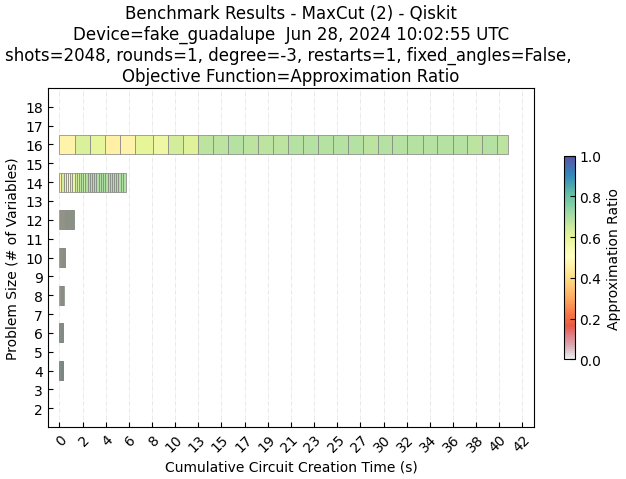

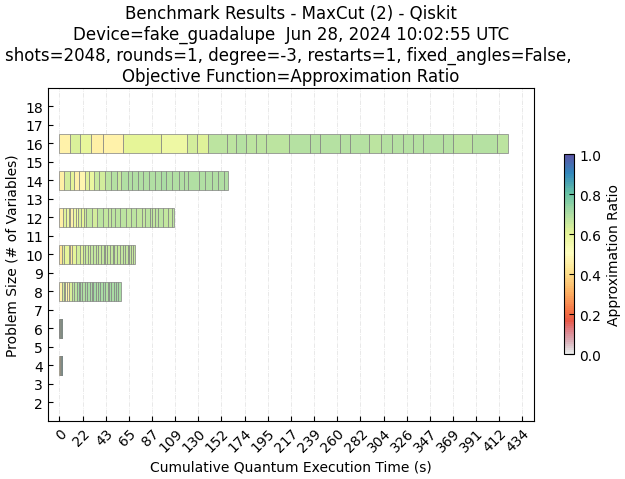

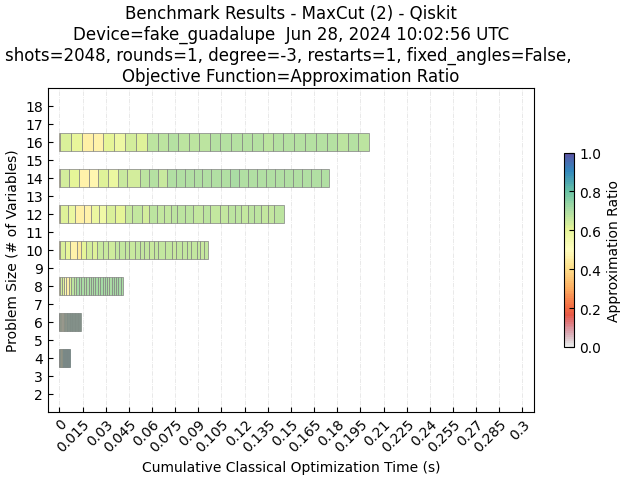

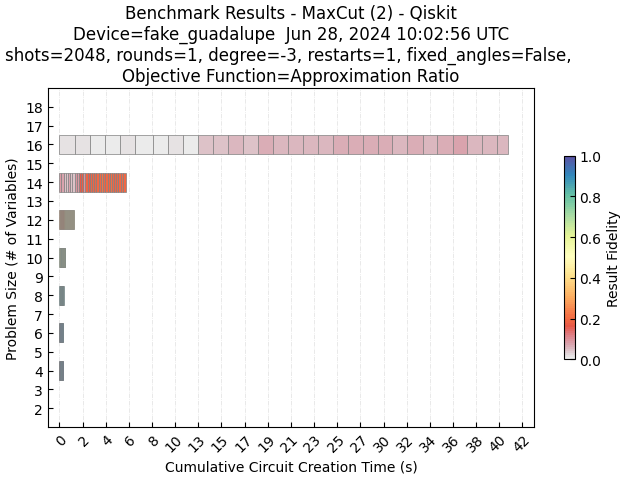

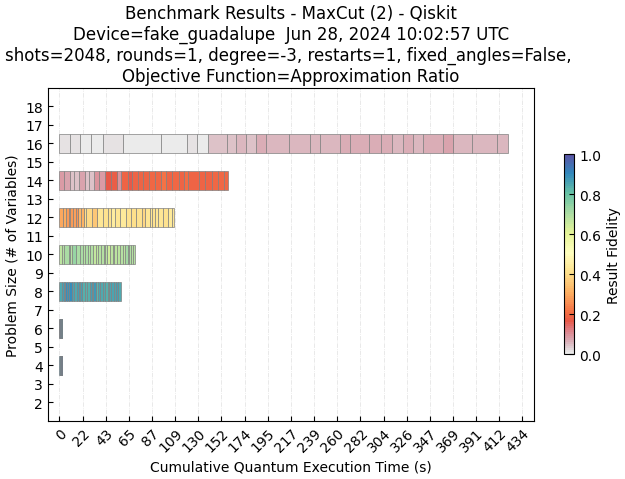

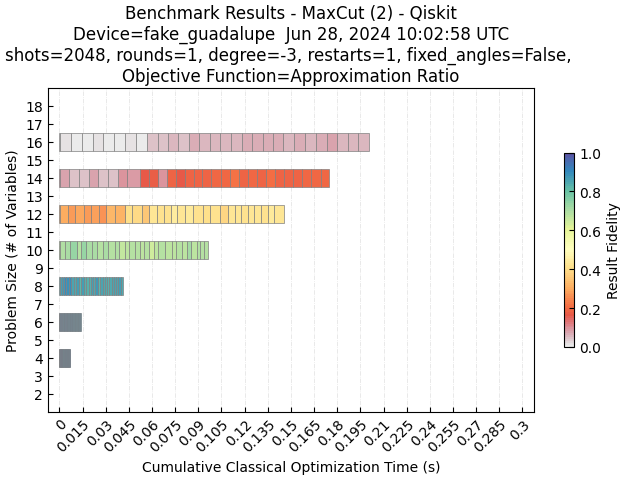

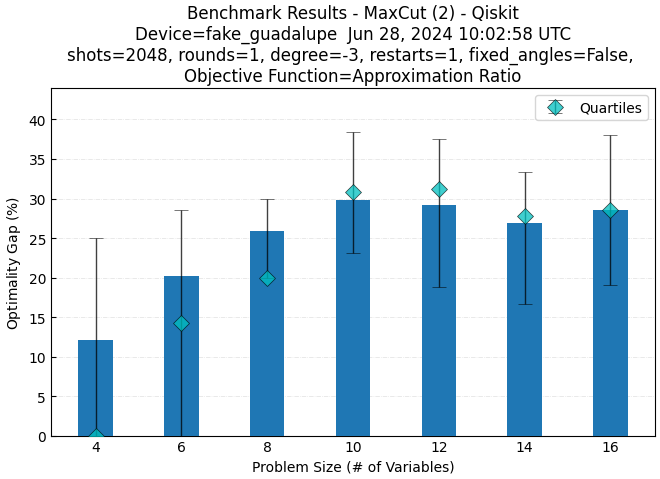

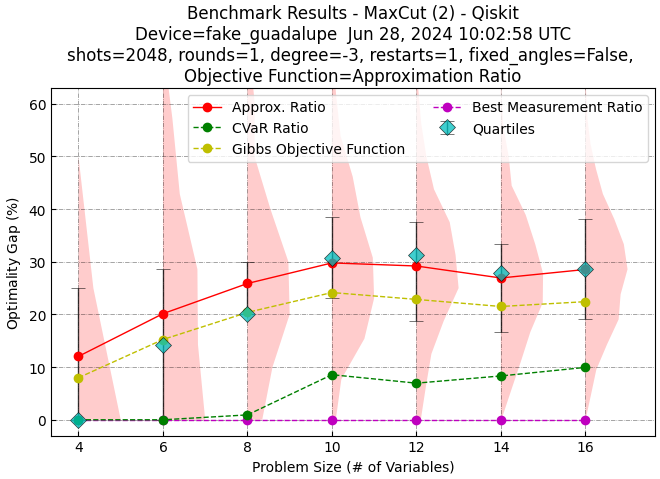

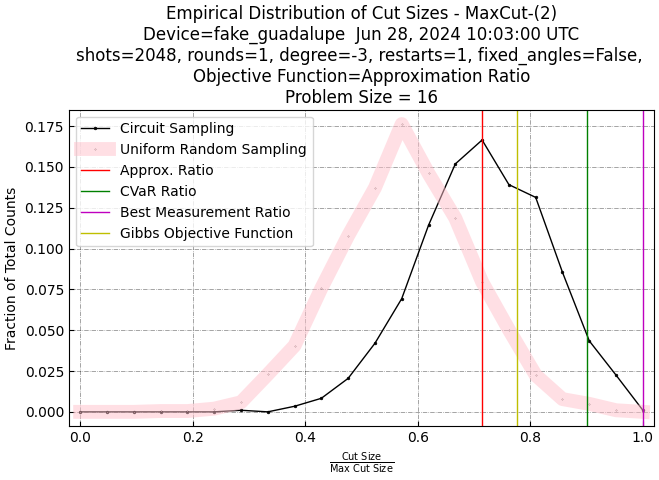

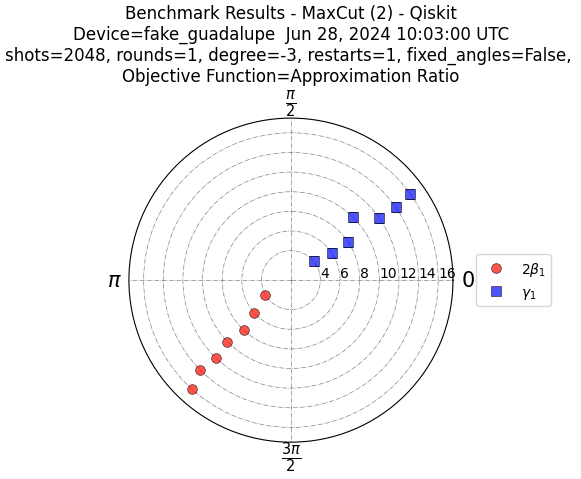

In [8]:
import sys
sys.path.insert(1, "maxcut/fake_backend")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

score_metric=['approx_ratio', 'fidelity']
x_metric=['cumulative_create_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=1, degree=-3,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Expected Measurement Distribution Example

The next cell is an auto-generated circuit with beta and gamma set to the optimal parameters (in terms of pi)


Total counts are: {'1111': 19, '1011': 34, '0011': 102, '0111': 30, '0110': 128, '1101': 25, '1110': 20, '0100': 42, '1001': 117, '1010': 119, '0000': 35, '0010': 44, '0101': 99, '1100': 114, '0001': 30, '1000': 42}
          ┌───┐                                                         »
q12605_0: ┤ H ├──■────────────────────■────■────────────────────■────■──»
          ├───┤┌─┴─┐┌──────────────┐┌─┴─┐  │                    │    │  »
q12605_1: ┤ H ├┤ X ├┤ Rz(-0.59062) ├┤ X ├──┼────────────────────┼────┼──»
          ├───┤└───┘└──────────────┘└───┘  │                    │  ┌─┴─┐»
q12605_2: ┤ H ├────────────────────────────┼────────────────────┼──┤ X ├»
          ├───┤                          ┌─┴─┐┌──────────────┐┌─┴─┐└───┘»
q12605_3: ┤ H ├──────────────────────────┤ X ├┤ Rz(-0.59062) ├┤ X ├─────»
          └───┘                          └───┘└──────────────┘└───┘     »
    c2: 4/══════════════════════════════════════════════════════════════»
                                            

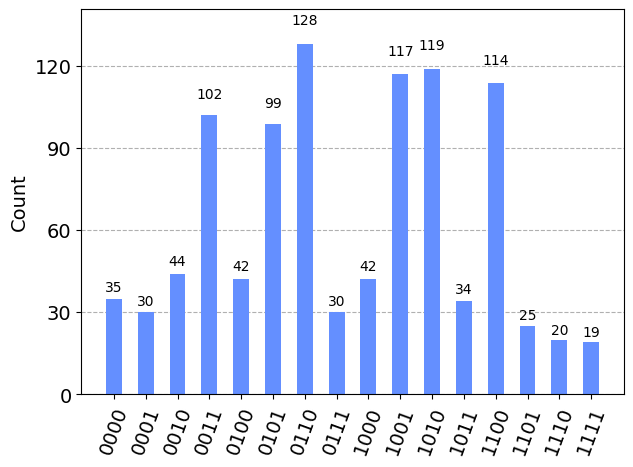

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

beta = 0.08
gamma = -0.094
cycle_time = 0

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr, name="main")
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.rz(2*3.14159*gamma, qr[1])
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[0], qr[3])
qc.cx(qr[0], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[0], qr[2])
qc.cx(qr[1], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[1], qr[2])
qc.cx(qr[1], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[2], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[2], qr[3])
qc.rx(2*3.14159*beta, qr[0])
qc.rx(2*3.14159*beta, qr[1])
qc.rx(2*3.14159*beta, qr[2])
qc.rx(2*3.14159*beta, qr[3])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

# from qiskit import execute, Aer
# backend = Aer.get_backend("qasm_simulator")  # Use Aer qasm_simulator

# for fake backend
from qiskit.providers.fake_provider import FakeGuadalupe
backend = FakeGuadalupe()  

job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts are:", counts)

# Draw the circuit
print(qc)

# Plot a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)
